In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train_df = pd.read_csv('playground-series-s4e12/train.csv')
test_df = pd.read_csv('playground-series-s4e12/test.csv')

In [11]:
train_df.shape, test_df.shape

((1200000, 21), (800000, 20))

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [14]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


### Exploring the data

In [15]:
train_df.columns = train_df.columns.str.lower().str.replace(" ", "_")
test_df.columns = test_df.columns.str.lower().str.replace(" ", "_")

In [16]:
train_df = train_df.drop("id", axis=1)
test_df = test_df.drop("id", axis=1)

In [18]:
train_df.describe(include="all").round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1181295.0,NaN,NaN,NaN,41.15,13.54,18.0,30.0,41.0,53.0,64.0
gender,1200000,2,Male,602571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,1155051.0,NaN,NaN,NaN,32745.22,32179.51,1.0,8001.0,23911.0,44634.0,149997.0
marital_status,1181471,3,Single,395391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_dependents,1090328.0,NaN,NaN,NaN,2.01,1.42,0.0,1.0,2.0,3.0,4.0
education_level,1200000,4,Master's,303818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,841925,3,Employed,282750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health_score,1125924.0,NaN,NaN,NaN,25.61,12.2,2.01,15.92,24.58,34.53,58.98
location,1200000,3,Suburban,401542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_type,1200000,3,Premium,401846,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- all numerical features have different scales.
- cat columns have <= 4 distinct categories, so not many. 
- `education_level` and `exercise_frequency` can be encoded as ordinal variables. rest of the cat columns can be 1-hot encoded.
- can `number_of_dependents` be treated as a integer column and as a cat column? Yes, see below cell
- `annual_income` has very high std deviation, std is nearly = to the mean of annual_income
- `healthscore` in the original dataset seems to go beyond the max value we have in this competition's training dataset. But this comp's test set is within limits of training set healthscore.
- `previous_claims` is not about amount but the no. of times a person has used insurance claims before. Ranging from [0,9]. This variable has outliers.
- `insurance_duration` is a cat column.
- we can extract year from `policy_start_date` and that might be a useful feature given YoY inflation likely affects insurance premium. policy start dates range from 2019 to 2024
- `customer_feedback` is a cat variable. can be encoded as ordinal variable. 

In [28]:
train_df.number_of_dependents[~train_df.number_of_dependents.isnull()].astype(np.int64)

0          1
1          3
2          3
3          2
4          1
          ..
1199994    4
1199995    0
1199997    0
1199998    1
1199999    0
Name: number_of_dependents, Length: 1090328, dtype: int64

Since `number_of_dependents` does not contain dubious float values like 2.1, 3.7, etc we can treat it as an ordinal variable.

In [38]:
train_df.health_score.max()

58.97591405405534

In [39]:
test_df.health_score.max()

57.95735078742232

In [40]:
train_df.previous_claims

0          2.0
1          1.0
2          1.0
3          1.0
4          0.0
          ... 
1199995    NaN
1199996    NaN
1199997    0.0
1199998    1.0
1199999    0.0
Name: previous_claims, Length: 1200000, dtype: float64

In [41]:
train_df.insurance_duration[~train_df.insurance_duration.isnull()].astype(np.int64)

0          5
1          2
2          3
3          1
4          4
          ..
1199995    3
1199996    4
1199997    6
1199998    4
1199999    6
Name: insurance_duration, Length: 1199999, dtype: int64

In [46]:
pd.to_datetime(train_df.policy_start_date).dt.year.unique()

array([2023, 2024, 2021, 2022, 2020, 2019])

policy start dates range from 2019 to 2024

In [51]:
train_df.customer_feedback.unique()

array(['Poor', 'Average', 'Good', nan], dtype=object)

`customer_feedback` is a cat variable. can be encoded as ordinal variable. 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'number_of_dependents'}>],
       [<Axes: title={'center': 'health_score'}>,
        <Axes: title={'center': 'previous_claims'}>,
        <Axes: title={'center': 'vehicle_age'}>],
       [<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'insurance_duration'}>,
        <Axes: title={'center': 'premium_amount'}>]], dtype=object)

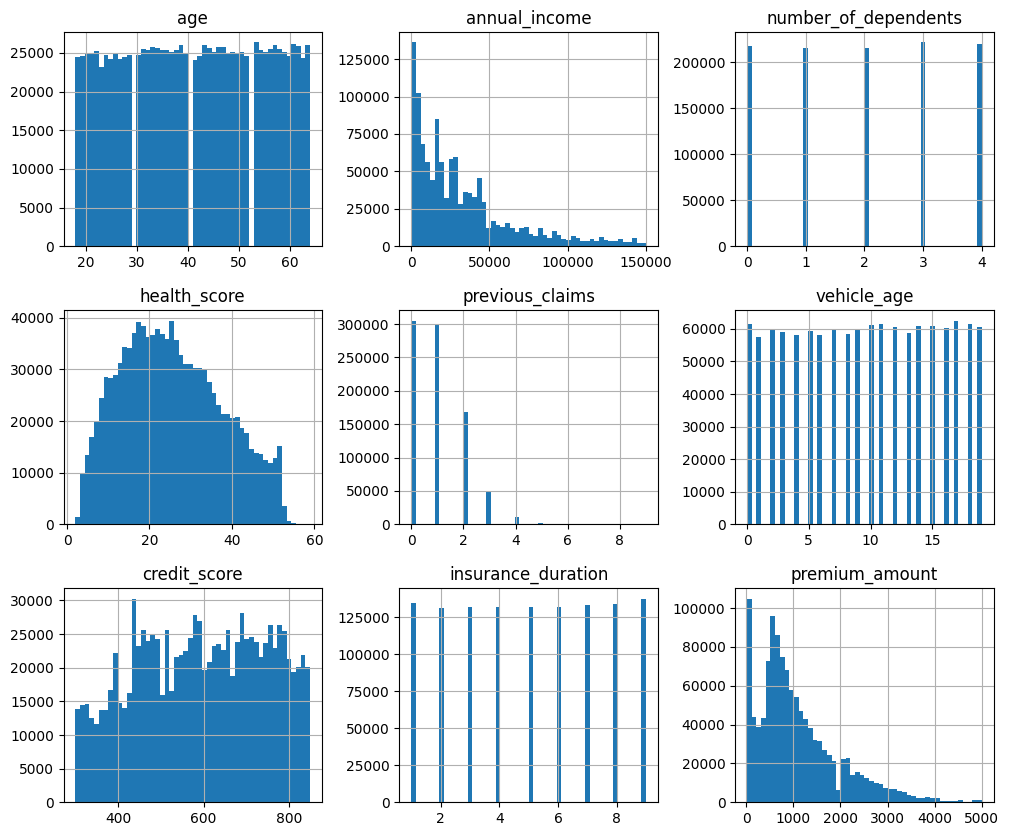

In [53]:
train_df.hist(bins=50, figsize=(12, 10))

- `annual_income` and `premium_amount` are skewed and need transformation.
- `credit_score` 's distribution is not very clear.
- 'health_score' 's distribution may also need some type of transformation. maybe bucketizing can be tried. 

<Axes: >

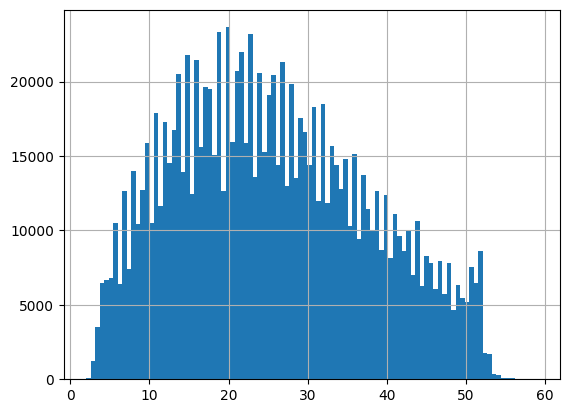

In [57]:
train_df.health_score.hist(bins= 100)

### Create a test set and keep it aside:

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

### Further EDA:

In [65]:
corr = train_set.corr(numeric_only=True)

In [66]:
corr

,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,premium_amount
age,1.000000,0.000478,0.001566,0.000596,0.002164,-0.002612,0.002261,0.000280,-0.002265
annual_income,0.000478,1.000000,0.002133,0.025528,0.041607,-0.000688,-0.201136,0.000277,-0.011563
number_of_dependents,0.001566,0.002133,1.000000,0.004716,-0.004262,0.000502,-0.001745,0.000229,-0.000749
health_score,0.000596,0.025528,0.004716,1.000000,0.001737,0.001024,0.011523,0.002360,0.016036
previous_claims,0.002164,0.041607,-0.004262,0.001737,1.000000,-0.000308,0.035855,0.002902,0.047092
vehicle_age,-0.002612,-0.000688,0.000502,0.001024,-0.000308,1.000000,0.001105,0.002858,-0.000360
credit_score,0.002261,-0.201136,-0.001745,0.011523,0.035855,0.001105,1.000000,0.000030,-0.025949
insurance_duration,0.000280,0.000277,0.000229,0.002360,0.002902,0.002858,0.000030,1.000000,-0.000358
premium_amount,-0.002265,-0.011563,-0.000749,0.016036,0.047092,-0.000360,-0.025949,-0.000358,1.000000


In [68]:
corr['premium_amount'].sort_values()

credit_score           -0.025949
annual_income          -0.011563
age                    -0.002265
number_of_dependents   -0.000749
vehicle_age            -0.000360
insurance_duration     -0.000358
health_score            0.016036
previous_claims         0.047092
premium_amount          1.000000
Name: premium_amount, dtype: float64

In [61]:
from pandas.plotting import scatter_matrix

In [71]:
train_set.columns

Index(['age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'policy_start_date',
       'customer_feedback', 'smoking_status', 'exercise_frequency',
       'property_type', 'premium_amount'],
      dtype='object')

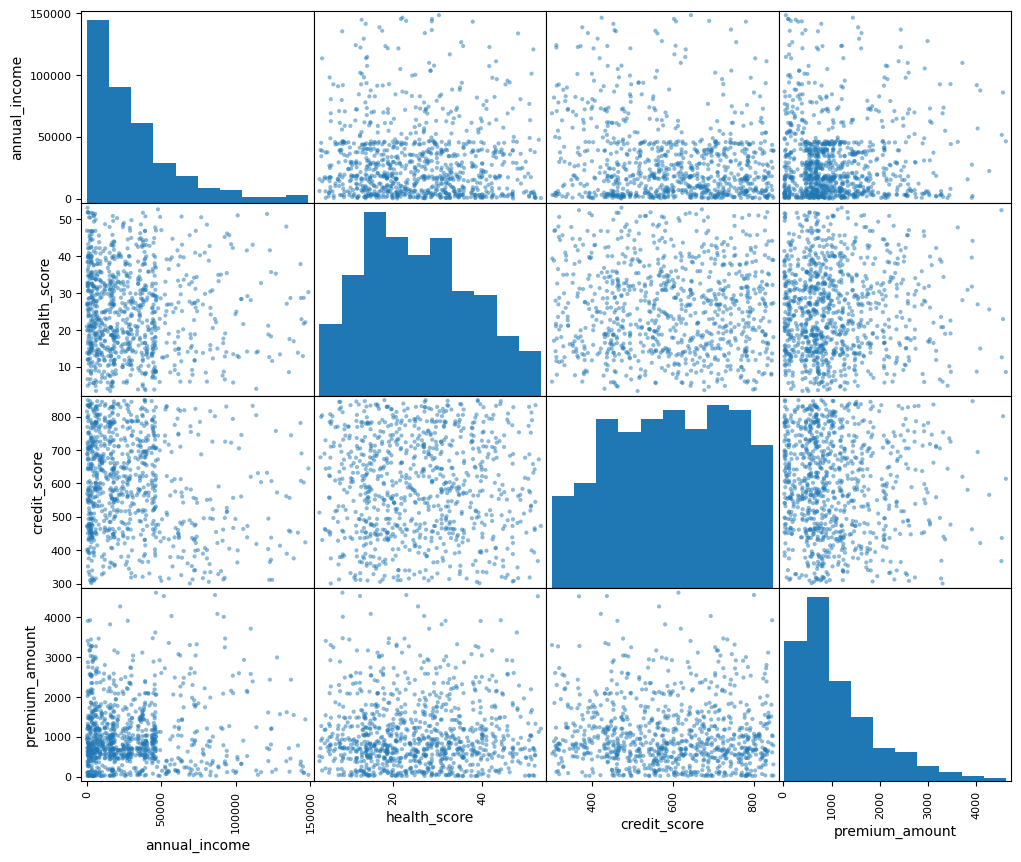

In [76]:
scatter_matrix(train_set[['annual_income', 'health_score', 'credit_score', 'premium_amount']].sample(1000), figsize=(12, 10))
plt.show()

- Linear correlations with the target variable are not standing out. 

In [182]:
X_train, X_test = train_test_split(train_df, test_size=0.2, random_state=42)

In [123]:
X_train

,age,gender,annual_income,marital_status,number_of_dependents,education_level,occupation,health_score,location,policy_type,previous_claims,vehicle_age,credit_score,insurance_duration,policy_start_date,customer_feedback,smoking_status,exercise_frequency,property_type,premium_amount
404339,45.0,Male,91315.0,Divorced,3.0,Bachelor's,NaN,43.926883,Urban,Comprehensive,NaN,1.0,311.0,2.0,2024-08-11 15:21:39.134960,Poor,No,Rarely,House,2386.0
748487,51.0,Female,5280.0,Married,1.0,PhD,NaN,41.854227,Rural,Basic,NaN,1.0,634.0,8.0,2020-06-20 15:21:39.098696,Poor,Yes,Monthly,Condo,285.0
435951,48.0,Female,41318.0,Divorced,0.0,Master's,NaN,51.750192,Urban,Comprehensive,1.0,12.0,759.0,9.0,2021-02-05 15:21:39.134960,Poor,Yes,Rarely,Condo,654.0
311284,43.0,Female,30372.0,Divorced,0.0,PhD,Unemployed,20.666786,Urban,Comprehensive,2.0,8.0,460.0,1.0,2022-11-11 15:21:39.093681,Average,No,Monthly,Condo,1095.0
318790,18.0,Male,12891.0,Married,NaN,Bachelor's,NaN,36.995102,Urban,Basic,NaN,18.0,831.0,3.0,2021-01-01 15:21:39.095696,Poor,Yes,Monthly,Apartment,1334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,30.0,Female,2789.0,Single,4.0,High School,NaN,15.965779,Suburban,Basic,NaN,18.0,328.0,5.0,2020-10-08 15:21:39.237118,Good,No,Rarely,Apartment,538.0
259178,35.0,Male,72512.0,Divorced,2.0,Bachelor's,Employed,23.914243,Urban,Comprehensive,0.0,16.0,338.0,9.0,2022-01-15 15:21:39.194829,Poor,No,Daily,House,819.0
131932,43.0,Male,85463.0,Married,0.0,Bachelor's,NaN,25.151808,Urban,Premium,0.0,8.0,849.0,3.0,2023-09-30 15:21:39.155231,Average,Yes,Daily,Condo,403.0
671155,49.0,Male,5908.0,Divorced,0.0,Bachelor's,Employed,41.637977,Rural,Comprehensive,0.0,2.0,444.0,1.0,2019-10-11 15:21:39.264504,Good,Yes,Monthly,Condo,542.0


In [124]:
X_train.corr(numeric_only=True)

,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,premium_amount
age,1.000000,0.000478,0.001566,0.000596,0.002164,-0.002612,0.002261,0.000280,-0.002265
annual_income,0.000478,1.000000,0.002133,0.025528,0.041607,-0.000688,-0.201136,0.000277,-0.011563
number_of_dependents,0.001566,0.002133,1.000000,0.004716,-0.004262,0.000502,-0.001745,0.000229,-0.000749
health_score,0.000596,0.025528,0.004716,1.000000,0.001737,0.001024,0.011523,0.002360,0.016036
previous_claims,0.002164,0.041607,-0.004262,0.001737,1.000000,-0.000308,0.035855,0.002902,0.047092
vehicle_age,-0.002612,-0.000688,0.000502,0.001024,-0.000308,1.000000,0.001105,0.002858,-0.000360
credit_score,0.002261,-0.201136,-0.001745,0.011523,0.035855,0.001105,1.000000,0.000030,-0.025949
insurance_duration,0.000280,0.000277,0.000229,0.002360,0.002902,0.002858,0.000030,1.000000,-0.000358
premium_amount,-0.002265,-0.011563,-0.000749,0.016036,0.047092,-0.000360,-0.025949,-0.000358,1.000000


```
previous_claims and credit_score are +vely correlated. 

annual_income and credit_score are -vely correlated (stronger). 
```

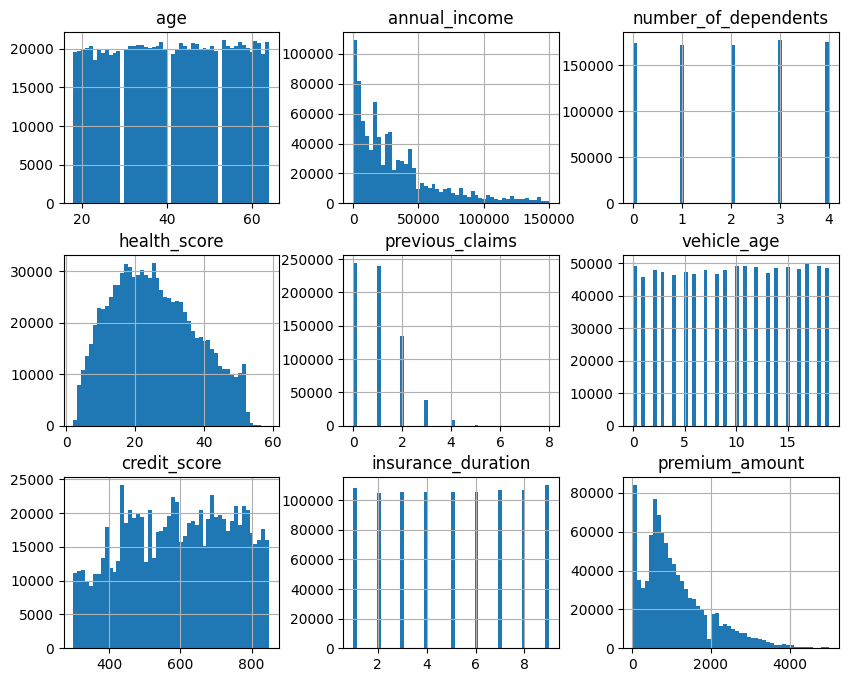

In [184]:
X_train.hist(bins=50, figsize=(10, 8))
plt.show()

```
number_of_dependents, previous_claims, vehicle_age, insurance_duration are all categorical, not continuous. 
```

In [185]:
X_train.describe()

,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,premium_amount
count,944952.000000,924086.000000,872136.000000,900671.000000,668845.000000,959996.000000,849726.000000,959999.000000,960000.000000
mean,41.153924,32746.553583,2.008001,25.617870,1.003576,9.572251,592.988834,5.015500,1102.505529
std,13.535243,32186.069992,1.417227,12.206051,0.983616,5.774526,149.952656,2.594761,865.134312
min,18.000000,1.000000,0.000000,2.012237,0.000000,0.000000,300.000000,1.000000,20.000000
25%,30.000000,7991.000000,1.000000,15.919431,0.000000,5.000000,468.000000,3.000000,514.000000
50%,41.000000,23935.500000,2.000000,24.587778,1.000000,10.000000,595.000000,5.000000,872.000000
75%,53.000000,44635.000000,3.000000,34.539742,2.000000,15.000000,721.000000,7.000000,1508.000000
max,64.000000,149997.000000,4.000000,58.975914,8.000000,19.000000,849.000000,9.000000,4999.000000


In [186]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [188]:
X_train.columns

Index(['age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'policy_start_date',
       'customer_feedback', 'smoking_status', 'exercise_frequency',
       'property_type', 'premium_amount'],
      dtype='object')

In [189]:
cat_columns = ['gender', 'marital_status', 'number_of_dependents', 'education_level', 'occupation',
                'location', 'policy_type', 'previous_claims', 'insurance_duration', 'customer_feedback',
                 'smoking_status', 'exercise_frequency', 'property_type']

In [190]:
X_cat = X_train[cat_columns]

In [193]:
cat_imputer = SimpleImputer(strategy="most_frequent")

In [194]:
X_cat = cat_imputer.fit_transform(X_cat)

In [195]:
X_cat.shape

(960000, 13)

In [199]:
X_cat

array([['Male', 'Divorced', 3.0, ..., 'No', 'Rarely', 'House'],
       ['Female', 'Married', 1.0, ..., 'Yes', 'Monthly', 'Condo'],
       ['Female', 'Divorced', 0.0, ..., 'Yes', 'Rarely', 'Condo'],
       ...,
       ['Male', 'Married', 0.0, ..., 'Yes', 'Daily', 'Condo'],
       ['Male', 'Divorced', 0.0, ..., 'Yes', 'Monthly', 'Condo'],
       ['Female', 'Single', 2.0, ..., 'Yes', 'Monthly', 'Apartment']],
      dtype=object)

In [200]:
encoder = OneHotEncoder()

In [201]:
X_cat = pd.DataFrame(X_cat, columns=cat_imputer.feature_names_in_)

In [202]:
X_cat = encoder.fit_transform(X_cat)

In [211]:
X_cat.shape

(960000, 53)

In [212]:
X_cat = pd.DataFrame(X_cat.toarray(), columns=encoder.get_feature_names_out())

In [213]:
X_cat.head()

,gender_Female,gender_Male,marital_status_Divorced,marital_status_Married,marital_status_Single,number_of_dependents_0.0,number_of_dependents_1.0,number_of_dependents_2.0,number_of_dependents_3.0,number_of_dependents_4.0,...,customer_feedback_Poor,smoking_status_No,smoking_status_Yes,exercise_frequency_Daily,exercise_frequency_Monthly,exercise_frequency_Rarely,exercise_frequency_Weekly,property_type_Apartment,property_type_Condo,property_type_House
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#############

In [245]:
y = np.log(y)

In [215]:
X = X_train[['annual_income', 'health_score', 'credit_score']]
y = X_train['premium_amount']

In [216]:
simple_imputer = SimpleImputer(strategy="median")

X = simple_imputer.fit_transform(X)

In [217]:
X = pd.DataFrame(X, columns=simple_imputer.feature_names_in_)
X['income_credit_score'] = X['annual_income'] / X['credit_score']

In [218]:
X['income_credit_score'] = X['income_credit_score'].apply(np.sqrt)

In [219]:
scaler = StandardScaler()

In [220]:
X.columns

Index(['annual_income', 'health_score', 'credit_score', 'income_credit_score'], dtype='object')

In [221]:
X = X[['health_score', 'income_credit_score']]

In [222]:
X = scaler.fit_transform(X)

In [223]:
X

array([[ 1.55365439,  2.61934316],
       [ 1.37838373, -0.98104518],
       [ 2.21521941,  0.15402767],
       ...,
       [-0.03402836,  0.82484624],
       [ 1.3600969 , -0.78852644],
       [-0.08172463,  1.47247382]])

In [224]:
X = pd.DataFrame(X, columns=scaler.feature_names_in_)

In [227]:
X = pd.concat([X_cat, X], axis=1)

In [228]:
X.shape

(960000, 55)

In [229]:
from sklearn.linear_model import SGDRegressor

In [246]:
SGD_reg = SGDRegressor()

In [247]:
SGD_reg.fit(X, y)

SGDRegressor()

In [251]:
root_mean_squared_log_error(np.exp(y), np.exp(SGD_reg.predict(X)))

1.0938566609886617

In [233]:
root_mean_squared_log_error(y, SGD_reg.predict(X))

1.171685308669225

In [235]:
from sklearn.ensemble import RandomForestRegressor

In [236]:
rnd_forest_reg = RandomForestRegressor(n_estimators=200, max_depth=7, random_state=42)

In [237]:
rnd_forest_reg.fit(X, y)

RandomForestRegressor(max_depth=7, n_estimators=200, random_state=42)

In [238]:
root_mean_squared_log_error(y, rnd_forest_reg.predict(X))

1.1696565419462857

#### create a pipeline/function to automate impute, scaling, encoding, transformation -> GBR

> np.sqrt or np.log transformation not giving normal curves on annual_income. why? 

In [141]:
y_test = X_test['premium_amount']
X_test = X_test[['annual_income', 'health_score', 'previous_claims', 'credit_score']]

X_test = simple_imputer.transform(X_test)
X_test = pd.DataFrame(X_test, columns=simple_imputer.feature_names_in_)
X_test['income_credit_score'] = X_test['annual_income'] / X_test['credit_score']
X_test['income_credit_score'] = X_test['income_credit_score'].apply(np.sqrt)
X_test = X_test[['health_score', 'previous_claims', 'income_credit_score']]
X_test = scaler.transform(X_test)

y_preds = SGD_reg.predict(X_test)

In [146]:
y_preds

array([1066.16414483, 1046.56502841, 1165.9049833 , ..., 1057.97778699,
       1067.77084389, 1094.34323312])

In [147]:
y_test

372605     2742.0
551204     1347.0
240320     2196.0
1047361     684.0
555362     1714.0
            ...  
458271     1286.0
1124744      24.0
720454      971.0
256458      562.0
423212     1484.0
Name: premium_amount, Length: 240000, dtype: float64

In [232]:
from sklearn.metrics import root_mean_squared_log_error

In [149]:
root_mean_squared_log_error(y_test, y_preds)

1.1697737651167952

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
rnd_forest_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [152]:
rnd_forest_reg.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=42)

In [153]:
y_forest_preds = rnd_forest_reg.predict(X_test)

In [154]:
root_mean_squared_log_error(y_test, y_forest_preds)

1.1707886106917031

### submission test

In [158]:
ids = test_df['id']
test_df = test_df.drop("id", axis=1)
test_df = test_df[['annual_income', 'health_score', 'previous_claims', 'credit_score']]

X_test_sub = simple_imputer.transform(test_df)
X_test_sub = pd.DataFrame(X_test_sub, columns=simple_imputer.feature_names_in_)
X_test_sub['income_credit_score'] = X_test_sub['annual_income'] / X_test_sub['credit_score']
X_test_sub['income_credit_score'] = X_test_sub['income_credit_score'].apply(np.sqrt)

X_test_sub = X_test_sub[['health_score', 'previous_claims', 'income_credit_score']]
X_test_sub = scaler.transform(X_test_sub)

In [159]:
y_test_sub = SGD_reg.predict(X_test_sub)

In [161]:
submission_df = pd.DataFrame({'id': ids, 'Premium Amount': y_test_sub})

In [162]:
submission_df.to_csv('submission.csv', index=False)